<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example_attention_mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example of Attention mechanism

In [9]:
# basic
import math
import numpy
# PyTorch
import torch
import torch.nn.functional as F

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# random tensors function from https://rockt.github.io/2018/04/30/einsum
def random_tensors(shape, num=1, requires_grad=False):
    tensors = [torch.randn(shape, requires_grad=requires_grad) for i in range(0,num)]
    return tensors[0] if num == 1 else tensors

In [ ]:
Y = {
     "apple": 9,
     "banana": 5,
     "chair": 2,
     }
print(Y.keys())
print(Y.values())

query = "apple"
print(Y[query])

dict_keys(['apple', 'banana', 'chair'])
dict_values([9, 5, 2])
9


() - tuple = tuple is a sequence of items that can't be changed (immutable).

[] - list = list is a sequence of items that can be changed (mutable).

{} - dictionary or set = dictionary is a list of key-value pairs, with unique keys (mutable).

In [46]:
Y = {
     "apple": numpy.array([9,0]),
     "banana":numpy.array([5,0]),
     "chair": numpy.array([0,2])
     }
print(Y.keys())
print(Y.values())

query = "apple"
print(Y[query])
print(Y.values())

dict_keys(['apple', 'banana', 'chair'])
dict_values([array([9, 0]), array([5, 0]), array([0, 2])])
[9 0]
dict_values([array([9, 0]), array([5, 0]), array([0, 2])])


For example, say we assign a 60% meaning based match for apple, a 40% match for banana, and 0% match for chair. We compute our final output value as the weighted sum of the values with the percentages:

In [47]:
query = "fruit"
Y_attn = 0.6 * Y["apple"] + 0.4 * Y["banana"] + 0.0 * Y["chair"]
print(Y_attn)

[7.4 0. ]


In [81]:
list(Y.keys())

['apple', 'banana', 'chair']

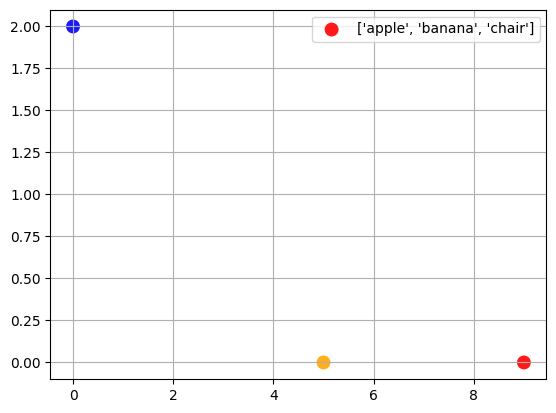

In [134]:
color = ['red','orange','blue']
#label = list(Y.keys())
label = ['apple','banana','chair']
plt.scatter([9,5,0],[0,0,2], c=color, s=100, label=label,
               alpha=0.9, edgecolors='none')

plt.legend()
plt.grid()

## Attention function

Query (Q): Represents the word you’re focusing on.

Key (K): Represents every other word in the sentence, helping the model decide which ones are important.

Value (V): Contains the actual information that the model will focus on.

Each token's embedding vector is transformed into three vectors: Query (Q), Key (K), and Value (V). These vectors are derived by multiplying the input embedding matrix with learned weight matrices for Q, K, and V. Here's a web search analogy to help us build some intuition behind these matrices:

Query (Q) is the search text you type in the search engine bar. This is the token you want to "find more information about".
Key (K) is the title of each web page in the search result window. It represents the possible tokens the query can attend to.
Value (V) is the actual content of web pages shown. Once we matched the appropriate search term (Query) with the relevant results (Key), we want to get the content (Value) of the most relevant pages.

In [171]:
# dimensions = batch size x sequence length x embedding dimension
#Y = random_tensors([3, 2, 4])

#Q = [[0., 0., 2.]]
#K = [[1., 0., 0.],[0., 0., 1.],[0., 0., 1.]]
#V = [[9., 5., 2.],[5., 5., 5.],[2., 2., 2.]]

Q = [[7., 0.]]
K = [[1., 0.],[9., 0.],[5., 0.]]
V = [[8., 0.],[6., 1.],[4., 2.]]


#Q = [[0., 7.]]
#K = [[0., 1.],[0., 9.],[0., 5.]]
#V = [[0., 8.],[1., 6.],[2., 4.]]

Q = torch.tensor(Q)
K = torch.tensor(K)
V = torch.tensor(V)
print(Q)
print(K)

tensor([[7., 0.]])
tensor([[1., 0.],
        [9., 0.],
        [5., 0.]])


In [172]:
scores = torch.matmul(Q, torch.transpose(K,0,1)) / math.sqrt(Q.size(-1))
print(scores)
p_attn = F.softmax(scores, dim = -1)
print(p_attn)
print(torch.matmul(p_attn, V))

tensor([[ 4.9497, 44.5477, 24.7487]])
tensor([[6.3506e-18, 1.0000e+00, 2.5200e-09]])
tensor([[6., 1.]])


In [173]:
# attention function based on http://nlp.seas.harvard.edu/2018/04/03/attention.html#attention
def attention_transf(query, key, value):
    "Compute 'Scaled Dot Product Attention'"

    # scaling factor for scores
    d_k = query.size(-1)

    # matrix multiplication to get every dot product for query and transposed key
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    #scores = torch.matmul(query, torch.transpose(key,0,1)) / math.sqrt(d_k)

    # apply softmax of the scores on the last dimensions (= sequence length)
    p_attn = F.softmax(scores, dim = -1)

    # matrix multiplication of attention matrix and value matrix to get output based
    out = torch.matmul(p_attn, value)

    return out, p_attn

In [174]:
# run Y through attention function
#out, p_attn = attention_transf(Y, Y, Y)
out, p_attn = attention_transf(Q, K, V)

# verify that softmax adds up to 1
p_attn[0].sum().item()

1.0

In [91]:
# print shapes
Q.shape, p_attn.shape, out.shape

(torch.Size([1, 2]), torch.Size([1, 3]), torch.Size([1, 2]))

## Visualization

tensor([[7., 0.],
        [1., 0.],
        [9., 0.],
        [5., 0.],
        [8., 0.],
        [6., 1.],
        [4., 2.]])


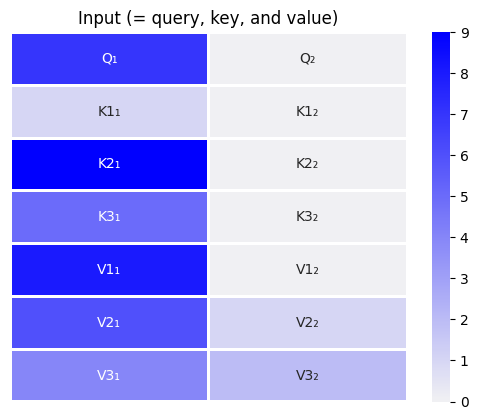

In [175]:
# input
Y = torch.cat((Q,K,V),axis=0)
text = numpy.array([['Q\N{SUBSCRIPT ONE}','Q\N{SUBSCRIPT TWO}'],
                ['K1\N{SUBSCRIPT ONE}','K1\N{SUBSCRIPT TWO}'],
                ['K2\N{SUBSCRIPT ONE}','K2\N{SUBSCRIPT TWO}'],
                ['K3\N{SUBSCRIPT ONE}','K3\N{SUBSCRIPT TWO}'],
                ['V1\N{SUBSCRIPT ONE}','V1\N{SUBSCRIPT TWO}'],
                ['V2\N{SUBSCRIPT ONE}','V2\N{SUBSCRIPT TWO}'],
                ['V3\N{SUBSCRIPT ONE}','V3\N{SUBSCRIPT TWO}']]
                )
print(Y)
plt.axis('off')
sns.heatmap(Y.numpy(), annot=text, cmap=sns.light_palette('blue', as_cmap=True), fmt="",linewidths=1).set_title('Input (= query, key, and value)');

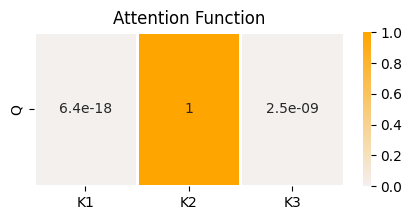

In [181]:
# attention matrix
# output
x_axis_labels = ['K1', 'K2', 'K3']
y_axis_labels = ['Q']
plt.figure(figsize=(5,2))
sns.heatmap(p_attn.numpy(), annot=True,
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            cmap=sns.light_palette("orange", as_cmap=True),
            linewidths=1).set_title('Attention Function'
            );

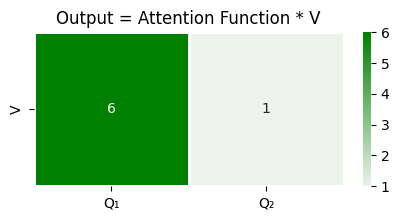

In [182]:
# output
x_axis_labels = ['Q\N{SUBSCRIPT ONE}', 'Q\N{SUBSCRIPT TWO}']
y_axis_labels = ['V']
plt.figure(figsize=(5,2))

sns.heatmap(out.numpy(), annot=True,
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            cmap=sns.light_palette("green", as_cmap=True),
            linewidths=1).set_title('Output = Attention Function * V'
            );


In [ ]:
p_attn[0,0].view(1,-1)

tensor([[1.]])

In [ ]:
Q[0].view(-1,1)

tensor([[1.],
        [2.],
        [3.]])